In [7]:
import os, sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
bigdama_path = "/home/andres/CAiN_repos/OutlierDenStream-BigDama18/"
sys.path.append(bigdama_path)

from readGroundTruth import groundTruth

In [9]:
def normalize_matrix(df):
    return (df - df.mean())/df.std()

configuration = json.load(open('configuration.json'))
print(configuration['featureModel'])

# Iterate on all the datasets chosen in the configuration list
for dataset in configuration['dataset']['list']:
    
    # read the ground truth file
    truth = groundTruth(bigdama_path + 'GrounTruth/'+dataset+'.txt', fileType='csv')
    
    # Iterate on all the nodes chosen in the configuration file
    for node in configuration['nodes']:

        # Read node dataset
        print('Dataset {} - Node: {} loading ...'.format(dataset,node))
        df = pd.read_csv(bigdama_path+configuration['dataset']['path']+node+dataset+'.csv', low_memory = False)\
                        .dropna()\
                        .drop('Unnamed: 0', axis=1)
        print('Done.')
        
        times = pd.DataFrame(columns=['time'])
        times['time'] = df['time'].astype('int')
        df = df.drop(['time'], axis=1)

        # Select the chosen features in the configuration file
        # By default the dataset contains all the features
        # If ControlPlane is chosen: only the CP features are extracted from the dataset
        # If DataPlane is chosen: the CP features are discarded, obtaining a dataset with only DataPlane
        # If CompleteFeatures is chosen: pass
        if configuration['featureModel'] == 'ControlPlane':
            features = 'CP'
            df = df[configuration['featureList']]
        elif configuration['featureModel'] == 'DataPlane':
            features = 'DP'
            df = df.drop(configuration['featureList'], axis=1)
        elif configuration['featureModel'] == 'CompleteFeatures':
            features = 'All'
        else:
            sys.exit('Something wrong in configuration feature model')

        # Dataset normalization
        df_short = df.loc[:,df.std()!=0]
        dfNormalized = normalize_matrix(df_short).dropna(axis=1)
        del df_short
        
        dfNormalized[0:].to_csv(dataset+'_'+node+'_'+features+'.emb', index=False, header=False, na_rep=0, sep='\t')
        #df[0:].to_csv(dataset+'_'+node+'_'+features+'.emb', index=False, header=False, na_rep=0, sep='\t')
        
        # Create anomaly data
        times['anomaly'] = 0 # add new column
        times['node'] = node

        # flag entries within anomaly ranges
        for anomaly in truth.events:
            mask = times['time'].between(anomaly['startTime'], anomaly['endTime'])
            times['anomaly'] = times['anomaly'].mask(mask, 1)

        times[0:].to_csv(dataset+'_'+node+'_'+features+'.lbl', index=False, header=True, na_rep=0, sep='\t')
        
dfNormalized.head()

DataPlane
Dataset portflap_first - Node: leaf1 loading ...
Done.


,HundredGigE0/0/0/0input-data-rate,HundredGigE0/0/0/0input-load,HundredGigE0/0/0/0input-packet-rate,HundredGigE0/0/0/0output-data-rate,HundredGigE0/0/0/0output-load,HundredGigE0/0/0/0output-packet-rate,HundredGigE0/0/0/1input-data-rate,HundredGigE0/0/0/1input-load,HundredGigE0/0/0/1input-packet-rate,HundredGigE0/0/0/1output-data-rate,...,HundredGigE0/0/0/7packets-received,HundredGigE0/0/0/7packets-sent,HundredGigE0/0/0/8bytes-received,HundredGigE0/0/0/8bytes-sent,HundredGigE0/0/0/8packets-received,HundredGigE0/0/0/8packets-sent,HundredGigE0/0/0/9bytes-received,HundredGigE0/0/0/9bytes-sent,HundredGigE0/0/0/9packets-received,HundredGigE0/0/0/9packets-sent
0,-0.303755,0.188153,-0.510220,-0.731936,-0.731065,-0.125302,0.632798,0.625162,0.736235,-1.237922,...,-1.721933,-1.722800,-1.684105,-1.727435,-1.708690,-1.728436,-1.685822,-1.707557,-1.705170,-1.710533
1,-0.238127,0.188153,-0.668176,-0.768800,-0.731065,-0.524728,0.613976,0.625162,0.694066,-0.949254,...,-1.703786,-1.704727,-1.668810,-1.709189,-1.691968,-1.710190,-1.670502,-1.691094,-1.688792,-1.693903
2,-0.042368,0.188153,-0.686747,-0.804364,-0.731065,-0.736473,0.586040,0.625162,0.670500,-0.954050,...,-1.701490,-1.702629,-1.666909,-1.706857,-1.689948,-1.707859,-1.668508,-1.688934,-1.686696,-1.691719
3,-0.094842,0.188153,-0.682760,-0.859906,-0.912664,-1.427014,0.543730,0.541966,0.562391,-0.337407,...,-1.691250,-1.692606,-1.658540,-1.696788,-1.680647,-1.697805,-1.659057,-1.679546,-1.676772,-1.682170
4,-0.113459,0.188153,-0.532728,-0.803910,-0.731065,-1.161881,0.519885,0.541966,0.584797,-0.203088,...,-1.681056,-1.683135,-1.649533,-1.687110,-1.671191,-1.687918,-1.650283,-1.670292,-1.667511,-1.672869


/home/andres/src/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  


ConversionError: Failed to convert value(s) to axis units: array(['leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1',
       'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1', 'leaf1'], dtype=object)

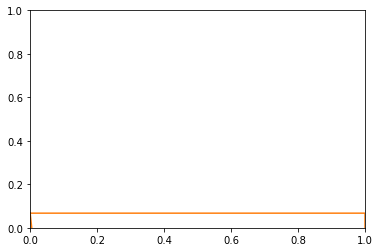

In [4]:
fig, ax = plt.subplots()
#ax.plot(times, dfNormalized['active-routes-count'], 'b')
#ax.plot(times, dfNormalized['deleted-routes-count'], 'g')
#ax.plot(times, dfNormalized['paths-count'], 'r')
#ax.plot(times, dfNormalized['protocol-route-memory'], 'y')
ax.plot(times, dfNormalized)
#ax.axis([0, 700, 900, 1500])
ax.set_ylim([-3, 3])
for anomaly in truth.events:
    ax.axvspan(anomaly['startTime'], anomaly['endTime'], alpha=0.2, color='red')